In [1]:
import pandas as pd
from settings import *
from scrape import *
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import mplcursors
import string
%matplotlib inline

In [2]:
#scrapePage(anacUrl)

In [3]:
# situacaoVoos = []
# fileCsvFinal = pd.DataFrame()
# for ano in range(2015, 2020):
#     print(f"Lendo os arquivos do ano {ano}")
#     for i in range(1, 13):
#             sep = [';', ',','\t']
#             sepIndex = 0
#             while True:
#                 try:
#                     fileCsv = pd.read_csv(
#                         f'data/{ano}-{i:02}.csv', encoding='ISO-8859-1', sep=sep[sepIndex], low_memory=False)
#                     if ('internet' in fileCsv.columns[0]):
#                         fileCsv.columns = fileCsv.iloc[0]
#                         fileCsv = fileCsv[1:]
#                     if len(fileCsv.columns) <= 1:
#                         raise ValueError('sepIndex')
#                     else:
#                         try:
#                             fileCsv = fileCsv.drop(columns='Data Prevista')
#                         except:
#                             pass
#                         fileCsv.columns = ['ICAO Empresa Aérea', 'Número Voo', 'Código DI', 'Código Tipo Linha',
#                                         'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino', 'Partida Prevista',
#                                         'Partida Real', 'Chegada Prevista', 'Chegada Real', 'Situação Voo',
#                                         'Código Justificativa']
                    
#                     fileCsv = fileCsv.assign(Ano = ano)
#                     fileCsv = fileCsv.assign(Mes = i)
                    
#                     fileCsvFinal = pd.concat([fileCsvFinal, fileCsv])
#                     print(len(fileCsvFinal))
#                     break
#                 except Exception as e:
#                     if e.args[0] == 'sepIndex':
#                         if (sepIndex < 3):
#                             sepIndex += 1
#                     else:
#                         print(e)
# fileCsvFinal['Situação Voo'] = fileCsvFinal['Situação Voo'].str.upper()
# fileCsvFinal['Situação Voo'] = fileCsvFinal['Situação Voo'].str.replace('NÃO REALIZADO', 'CANCELADO', regex=False)

In [19]:
fileCsvFinal = pd.read_csv('csvFinal.csv')
fileCsvFinal = fileCsvFinal.drop(columns='Unnamed: 0')

/home/gabriel/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
situacaoVoos = fileCsvFinal['Situação Voo'].value_counts()
situacaoVoos

REALIZADO    5077785
CANCELADO     485822
Name: Situação Voo, dtype: int64

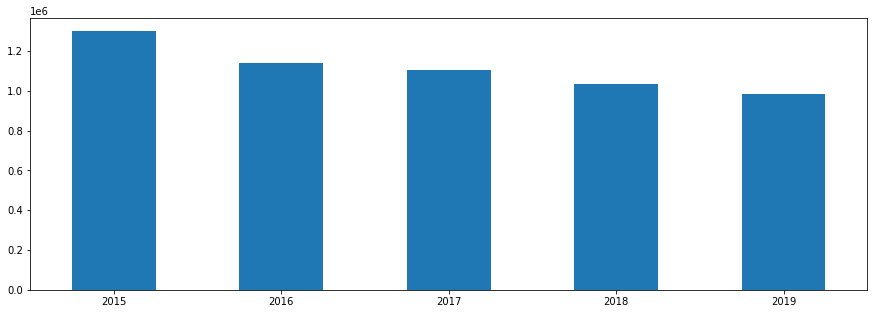

In [6]:
VoosPorAno = fileCsvFinal['Ano'].value_counts()
fig, axs = plt.subplots(figsize=(15, 5))
VoosPorAno.plot(kind='bar')
plt.xticks(rotation=50)
labels = axs.get_xticklabels()
for label in labels:
    label.set_rotation(0)
plt.setp(axs,
yticks=[0, 200000, 400000, 600000, 800000, 1000000, 1200000],
        )
plt.show()

In [7]:
teste = fileCsvFinal[['Situação Voo']].groupby(fileCsvFinal['ICAO Empresa Aérea'])

,Realizado,Cancelado
2015,1127070,174500
2016,1004756,134250
2017,992040,113444
2018,988725,45831
2019,965194,17797


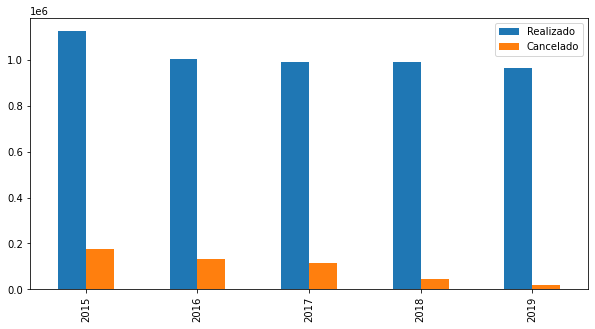

In [8]:
SituacaoPorAno = pd.DataFrame()
for situacao in fileCsvFinal['Situação Voo'].unique():
    df = fileCsvFinal.loc[fileCsvFinal['Situação Voo'] == situacao]
    df = df['Ano'].value_counts()
    SituacaoPorAno= pd.concat([SituacaoPorAno, df], axis=1)
SituacaoPorAno.columns = ['Realizado', 'Cancelado']
SituacaoPorAno.plot(kind='bar',figsize=(10,5))
SituacaoPorAno

Realizados :  5077785
Cancelados :  485822


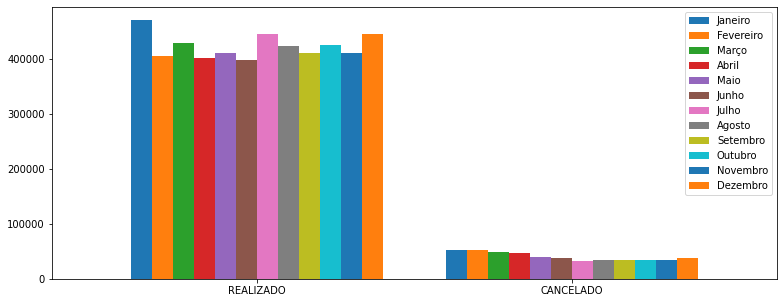

In [9]:
fig, axs = plt.subplots(figsize=(13, 5))
SituacaoPorMes = pd.DataFrame()
for mes in range(1, 13):
    df = fileCsvFinal.loc[fileCsvFinal['Mes'] == mes]
    df = df['Situação Voo'].value_counts()
    SituacaoPorMes= pd.concat([SituacaoPorMes, df], axis=1)
SituacaoPorMes.columns = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro','Outubro', 'Novembro', 'Dezembro']
SituacaoPorMes.plot(kind='bar', ax=axs, width=0.8)
labels = axs.get_xticklabels()
for label in labels:
    label.set_rotation(0)
print("Realizados : ", SituacaoPorMes.iloc[0].sum())
print("Cancelados : ", SituacaoPorMes.iloc[1].sum())

In [35]:
def f(ano):
    df = fileCsvFinal.loc[fileCsvFinal['Ano'] == ano]
    fig, axs = plt.subplots(figsize=(13, 5))
    SituacaoPorMes = pd.DataFrame()
    for mes in range(1, 13):
        df2 = df.loc[df['Mes'] == mes]
        df2 = df2['Situação Voo'].value_counts()
        SituacaoPorMes= pd.concat([SituacaoPorMes, df2], axis=1)
    SituacaoPorMes.columns = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro','Outubro', 'Novembro', 'Dezembro']
    SituacaoPorMes.plot(kind='bar', ax=axs, width=0.8)
    labels = axs.get_xticklabels()
    for label in labels:
        label.set_rotation(0)
    print(f"Média de voos realizados : {np.around(SituacaoPorMes.iloc[0].mean(), decimals=2)}")
    print(f"Média de voos cancelados : {np.around(SituacaoPorMes.iloc[1].mean(), decimals=2)}")

interact(f, ano=widgets.IntSlider(min=2015,max=2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='ano', max=2019, min=2015), Output()), _dom_classes=('…

<function __main__.f(ano)>

<AxesSubplot:ylabel='ICAO Empresa Aérea'>

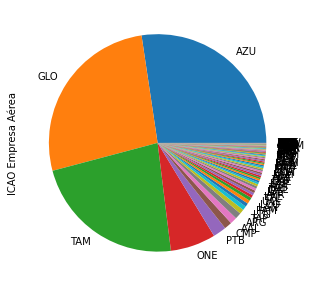

In [46]:
fig, axs = plt.subplots(figsize=(10, 5))
fileCsvFinal['ICAO Empresa Aérea'].value_counts().plot(kind='pie',ax=axs)